In [4]:
import pandas as pd
import os
import numpy as np

In [ ]:
import pandas as pd
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Data/Temp/FULL_prepared_data_SUP_v6.xlsx")

In [185]:
df_ampm=pd.read_excel("Data/Temp/FULL_prepared_data_ampm_SUP_v11.xlsx")

In [156]:
df_d=pd.read_csv("Data/Temp/raw_data_dayofweek.csv")

In [157]:
import matplotlib.font_manager as font_manager
# Use Times New Roman font
font_path = 'C:\\Windows\\Fonts\\times.ttf'
font_prop = font_manager.FontProperties(fname=font_path)

sns.set(font=font_prop.get_name())

In [158]:
df.Mode=df.Mode.replace("Bic","Bike")
df_d.Mode=df_d.Mode.replace("Bic","Bike")

In [159]:
df_bike=df[df.Mode=='Bike']
df_ped=df[df.Mode=='Ped']

### Time series Graphs

In [160]:
df_d_=df_d[(df_d.year>=2015) & (df_d.year<=2021)]

In [161]:
df_d_excludingallmode=df_d_[~((df_d_.Mode=="All")|(df_d_.Mode=="Ant"))]

Text(0, 0.5, 'Average Daily Traffic ')

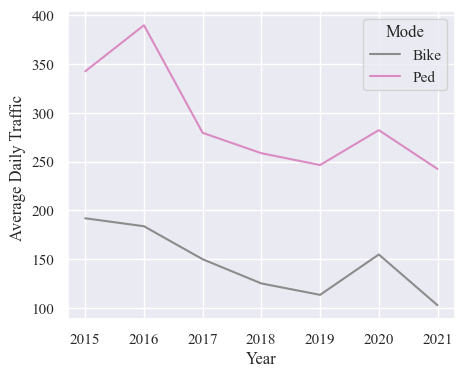

In [162]:
a=df_d_excludingallmode.groupby(['year', "Mode"], as_index=False)['count'].mean()
# x=list(a.keys())
# y=list(a.values)
# fig, ax = plt.subplots(figsize=(4.5, 4))
# sns.lineplot(x=x, y=y, ax=ax)
# ax.set_xticks(x)
# ax.set_xlabel('Year', fontproperties=font_prop)
# ax.set_ylabel('Average Annual Count', fontproperties=font_prop)
# ax.set_title('Yearly Average Annual Daily Count', fontproperties=font_prop)
# plt.tight_layout()
# plt.show()
fig, ax = plt.subplots(figsize=(5, 4))
sns.lineplot(x='year', y='count', hue='Mode', data=a, palette=['C7', 'C6'])
ax.set_xlabel('Year', fontproperties=font_prop)

ax.set_ylabel('Average Daily Traffic ', fontproperties=font_prop)

In [163]:
#Hourly
a=df.groupby(['year', 'hour'],as_index=False)['count'].mean()

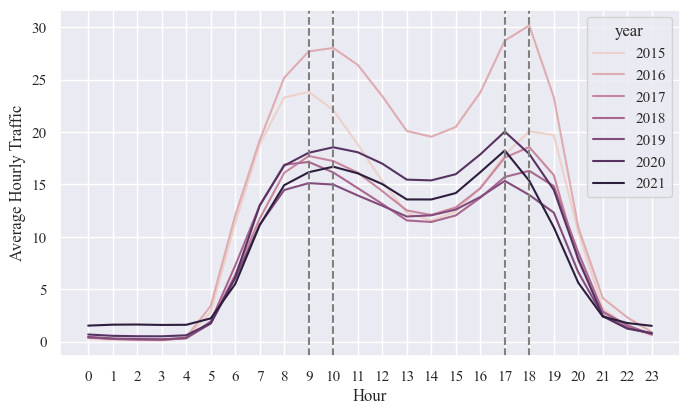

In [151]:
fig, ax = plt.subplots(figsize=(8, 4.5))
sns.lineplot(x='hour', y='count', hue='year', data=a)
ax.set_xlabel('Hour', fontproperties=font_prop)
ax.set_xticks(np.arange(0, 24, 1))
ax.set_xticklabels(np.arange(0, 24, 1))
ax.set_ylabel('Average Hourly Traffic', fontproperties=font_prop)
#ax.set_title('Average Annual Traffic for each hour of the day', fontproperties=font_prop)
#Vertical lines on peaks
ax.axvline(x=9, color='gray', linestyle='--')
ax.axvline(x=10, color='gray', linestyle='--')
ax.axvline(x=17, color='gray', linestyle='--')
ax.axvline(x=18, color='gray', linestyle='--')


In [33]:
d=df_d_[df_d_.Mode=="Bike"]
b=d.groupby(['year', 'day'],as_index=False)['count'].mean()

In [143]:
b['day'] = pd.Categorical(b['day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

Text(0, 0.5, 'Average Daily Bicycle Traffic')

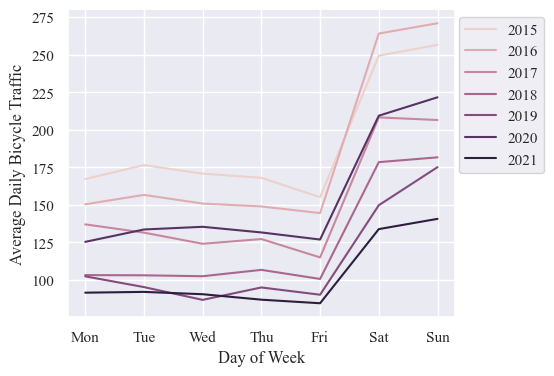

In [144]:


fig, ax = plt.subplots(figsize=(5, 4))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

sns.lineplot(x='day', y='count', hue='year', data=b)

# Move the legend to the top-right side of the graph
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

ax.set_xlabel('Day of Week', fontproperties=font_prop)
ax.set_ylabel('Average Daily Bicycle Traffic', fontproperties=font_prop)
#ax.set_title('Average Daily Pedestrian Traffic for Each Day of Week', fontproperties=font_prop)


### Descriptive table

#### Roadway

In [36]:
cols=['UI_025mile', 'UI_05mile', 'UI_1mile', 'UA_025mile', 'UA_05mile',
       'UA_1mile', 'UC_025mile', 'UC_05mile', 'UC_1mile', 'UL_025mile',
       'UL_05mile', 'UL_1mile', 'RI_025mile', 'RI_05mile', 'RI_1mile',
       'RA_025mile', 'RA_05mile', 'RA_1mile', 'RC_025mile', 'RC_05mile',
       'RC_1mile', 'RL_025mile', 'RL_05mile', 'RL_1mile']
df_=df[cols]

In [37]:
df_melted = df_.melt(var_name="Column", value_name="Density")

In [38]:
df_melted['Roadway_Type']=df_melted.Column.str[:2]
df_melted['Buffer']=df_melted.Column.str[3:]

In [39]:
a=df_melted.groupby(["Roadway_Type", "Buffer"], as_index=False).agg({'Density': 'sum'})

In [40]:

a['Roadway_Type'] = a['Roadway_Type'].replace({'UI': 'Urban Interstates/Freeway', 
                                               'UA': 'Urban Arterials', 
                                               'UC': 'Urban Collectors', 
                                               'UL': 'Urban Local',
                                               'RI': 'Rural Interstates/Freeway', 
                                               'RA': 'Rural Arterials', 
                                               'RC': 'Rural Collectors', 
                                               'RL': 'Rural Local'})

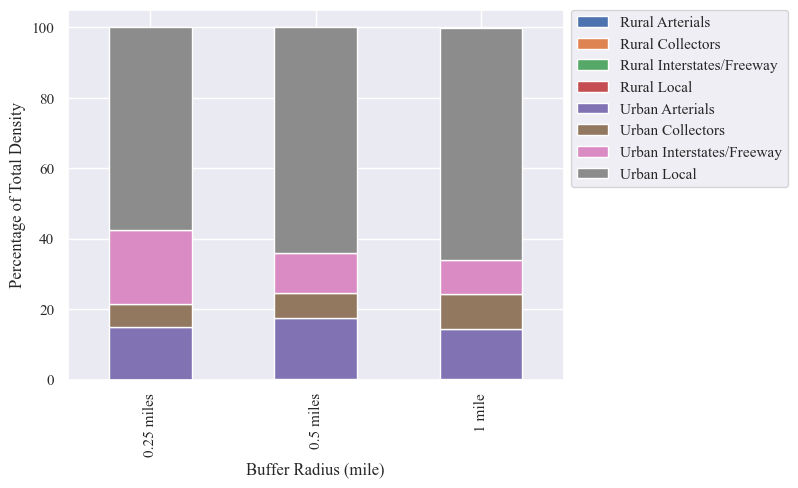

In [41]:
df_pivot = a.pivot(index='Buffer', columns='Roadway_Type', values='Density')

# Calculate percentages for each column in the DataFrame
row_totals = df_pivot.sum(axis=1)
df_percentages = df_pivot.divide(row_totals, axis=0) * 100

# Plot the pivoted and percentage-calculated DataFrame as a stacked bar plot
ax=df_percentages.plot(kind='bar', stacked=True)

# Add labels and title to the plot
#plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Percentage of Total Density',fontproperties=font_prop)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.76), ncol=1)

ax.set_xticklabels(['0.25 miles', '0.5 miles', '1 mile'])

# Show plot
plt.show()


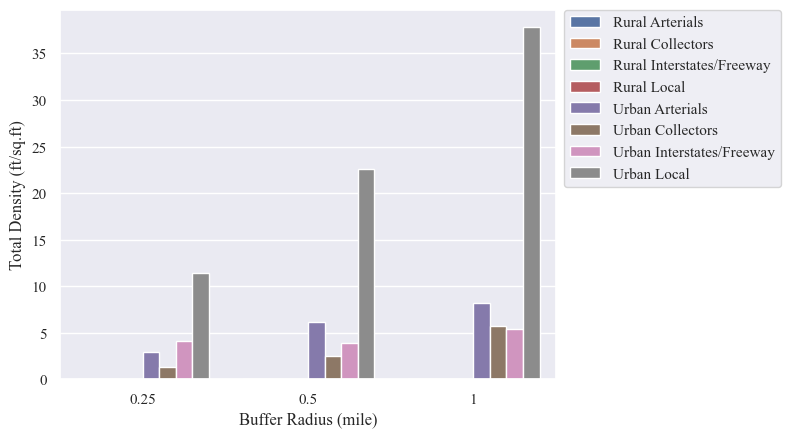

In [44]:

a['Roadway_Type'] = a['Roadway_Type'].replace({'UI': 'Urban Interstates/Freeway', 
                                               'UA': 'Urban Arterials', 
                                               'UC': 'Urban Collectors', 
                                               'UL': 'Urban Local',
                                               'RI': 'Rural Interstates/Freeway', 
                                               'RA': 'Rural Arterials', 
                                               'RC': 'Rural Collectors', 
                                               'RL': 'Rural Local'})
# Plot using seaborn
sns.barplot(x='Buffer', y='Density', hue='Roadway_Type', data=a)
labels = ['0.25', '0.5', '1']
plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Total Density (ft/sq.ft)',fontproperties=font_prop)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.76), ncol=1)
# Show plot
plt.show()

#### Transit

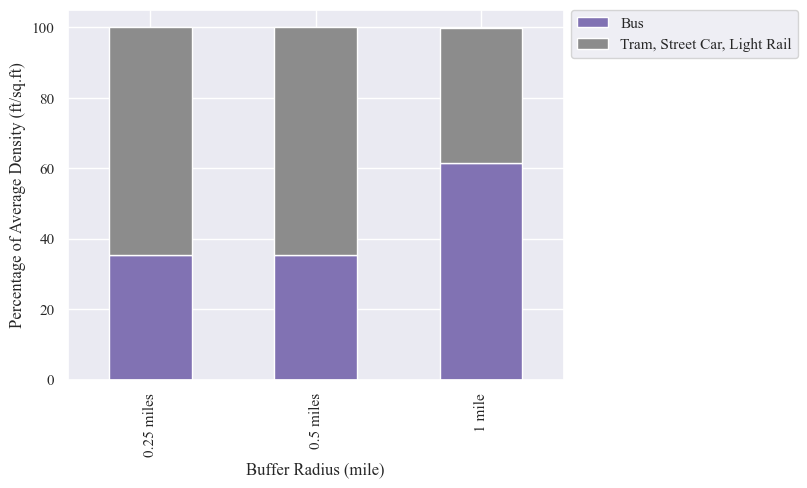

In [42]:
cols=['Bus_025', 'Tram_strcar_lrail_025', 'Bus_05',
       'Tram_strcar_lrail_05', 'Bus_1', 'Tram_strcar_lrail_1']
df_=df[cols]
df_melted = df_.melt(var_name="Column", value_name="Density")
df_melted['Transit_Type']=df_melted.Column.str.split("_").str[0]
df_melted['Buffer']=df_melted.Column.str.split("_").str[-1]
a=df_melted.groupby(["Transit_Type", "Buffer"], as_index=False).agg({'Density': 'mean'})
a['Transit_Type'] = a['Transit_Type'].replace({'Tram': "Tram, Street Car, Light Rail"})
#
df_pivot = a.pivot(index='Buffer', columns='Transit_Type', values='Density')
# Calculate percentages for each column in the DataFrame
row_totals = df_pivot.sum(axis=1)
df_percentages = df_pivot.divide(row_totals, axis=0) * 100

# Plot the pivoted and percentage-calculated DataFrame as a stacked bar plot
ax=df_percentages.plot(kind='bar', stacked=True,color=['C4', 'C7'])

# Add labels and title to the plot
#plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Percentage of Average Density (ft/sq.ft)',fontproperties=font_prop)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.934), ncol=1)
ax.set_xticklabels(['0.25 miles', '0.5 miles', '1 mile'])

# Show plot
plt.show()

In [43]:
df.columns

Index(['flowid_txdot', 'year', 'hour', 'count', 'Mode', 'direction',
       'stationid', 'TotPop_1mile', 'TotPopMale_1mile', 'TotPopFemale_1mile',
       ...
       'lu_replica', 'Intsct_05mile', 'Intsct_025mile', 'Intsct_1mile',
       'ADT_025mile', 'ADT_05mile', 'ADT_1mile', 'ADT_previous_year_025mile',
       'ADT_previous_year_05mile', 'ADT_previous_year_1mile'],
      dtype='object', length=160)

In [44]:
cols=['stops_025mile',
       'stops_05mile', 'stops_1mile']
df_=df[cols]

In [45]:
#Changing total stops into stops per 1mile radius buffer
df_1=df_.copy(deep=True)
df_1.stops_025mile=df_1.stops_025mile*16 #as the area from 0.25 mil radius to 1 mile radius is 16 time bigger
df_1.stops_05mile=df_1.stops_05mile*4 #as the area from 0.25 mil radius to 1 mile radius is 4 time bigger

In [46]:
df_melted = df_1.melt(var_name="Column", value_name="Density")

In [47]:
a=df_melted.groupby(['Column']).mean()

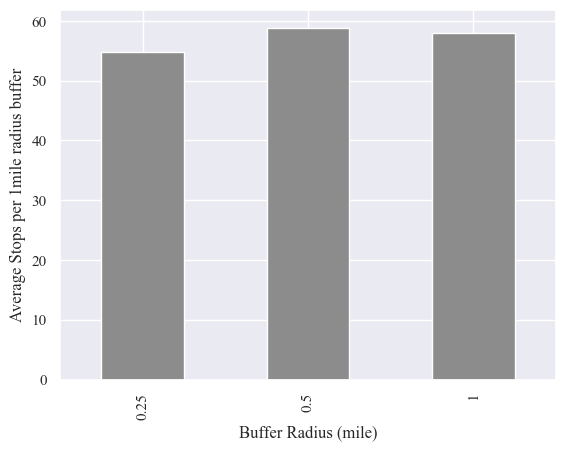

In [49]:
a.plot(kind="bar", color=["C7"])
labels=["0.25", "0.5", "1"]
plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Average Stops per 1mile radius buffer',fontproperties=font_prop)
plt.legend().remove()

### AM peak and PM peak

In [116]:
df_ampm=pd.read_excel("Data/Temp/FULL_prepared_data_ampm_SUP_v7.xlsx")

In [118]:
df_ampm.Mode=df_ampm.Mode.replace("Bic","Bike")

In [119]:
df_d_excludingallmode=df_ampm[~((df_ampm.Mode=="All") | (df_ampm.Mode=="Ant"))]

Text(0, 0.5, 'Average Daily Traffic (AM peak)')

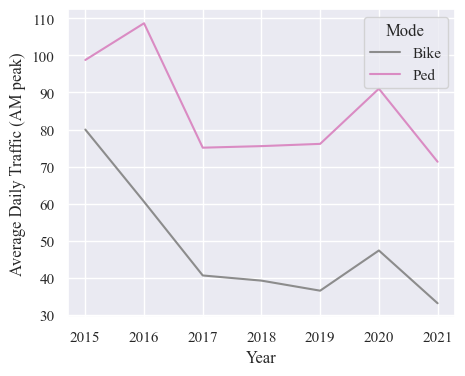

In [120]:
a=df_d_excludingallmode.groupby(['year', "Mode"], as_index=False)['ampeak', 'pmpeak'].mean()

fig, ax = plt.subplots(figsize=(5, 4))
sns.lineplot(x='year', y='ampeak', hue='Mode', data=a, palette=['C7', 'C6'])
ax.set_xlabel('Year', fontproperties=font_prop)

ax.set_ylabel('Average Daily Traffic (AM peak)', fontproperties=font_prop)
#ax.set_title('Average Daily Traffic (AM peak)', fontproperties=font_prop)

Text(0, 0.5, 'Average Daily Traffic (PM peak)')

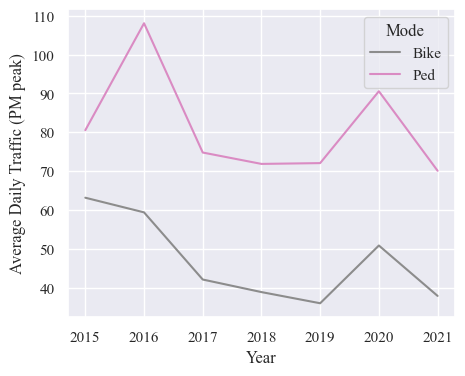

In [121]:

fig, ax = plt.subplots(figsize=(5, 4))
sns.lineplot(x='year', y='pmpeak', hue='Mode', data=a, palette=['C7', 'C6'])
ax.set_xlabel('Year', fontproperties=font_prop)

ax.set_ylabel('Average Daily Traffic (PM peak)', fontproperties=font_prop)
#ax.set_title('Average Daily Traffic (PM peak)', fontproperties=font_prop)

Text(0, 0.5, '')

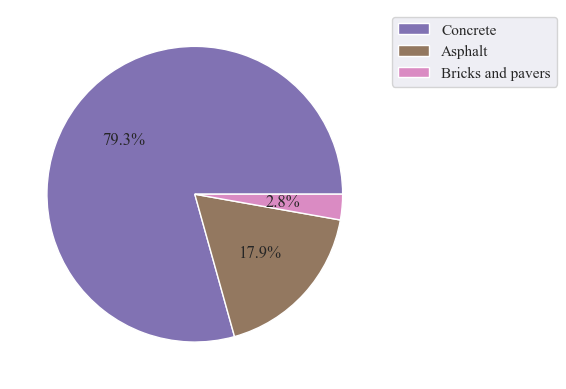

In [61]:
import matplotlib.pyplot as plt

df_unique = df_ampm.drop_duplicates(subset=['stationid'])
plt.figure()
surface_counts = df_unique['surface_type'].value_counts(normalize=True)
ax = surface_counts.plot(kind='pie', autopct='%1.1f%%', colors=['C4', 'C5', 'C6'], labels=['' for _ in surface_counts.index])
legend_labels = ['Concrete', 'Asphalt', 'Bricks and pavers']
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))
#plt.title('Surface type across all SUP stations')
plt.ylabel('')  # This line removes the y-axis label


Text(0.5, 1.0, 'Street lighting across all SUP stations')

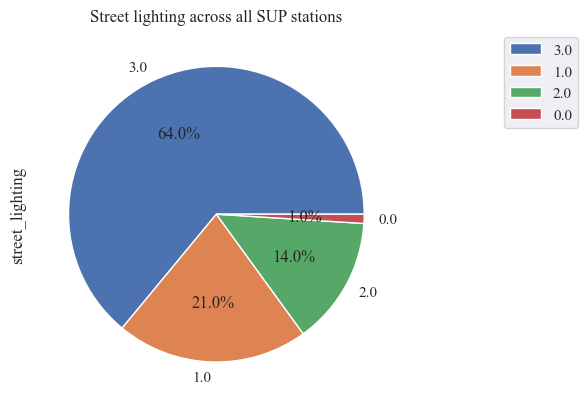

In [58]:
df_unique = df_ampm.drop_duplicates(subset=['stationid'])
plt.figure()
ax = df_unique['street_lighting'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
handles, legend_labels = ax.get_legend_handles_labels()
#legend_labels = ['None','One sided', 'Both sided', ,'Partial']
ax.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('Street lighting across all SUP stations')

Text(0.5, 1.0, 'surface_condition across all SUP stations')

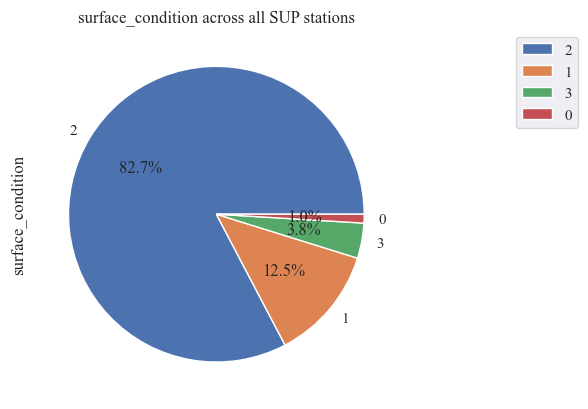

In [59]:
df_unique = df_ampm.drop_duplicates(subset=['stationid'])
plt.figure()
ax = df_unique['surface_condition'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
handles, legend_labels = ax.get_legend_handles_labels()
#legend_labels = ['Fair','One sided', 'Both sided', ,'Partial']
ax.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.title('surface_condition across all SUP stations')

In [60]:
df_ampm.street_lighting.value_counts()

3.0    463
1.0     78
2.0     59
0.0     14
Name: street_lighting, dtype: int64

In [97]:
df_ampm[df_ampm.Mode=='Bic'].daily_count.describe()

count     297.000000
mean      297.782490
std       319.897213
min         0.857143
25%        48.582874
50%       208.877774
75%       446.986161
max      1687.132794
Name: daily_count, dtype: float64

In [98]:
df_ampm[df_ampm.Mode=='Ped'].daily_count.describe()

count     286.000000
mean      612.639942
std       803.663414
min         4.000000
25%       118.046439
50%       233.014939
75%       796.834826
max      4050.635040
Name: daily_count, dtype: float64

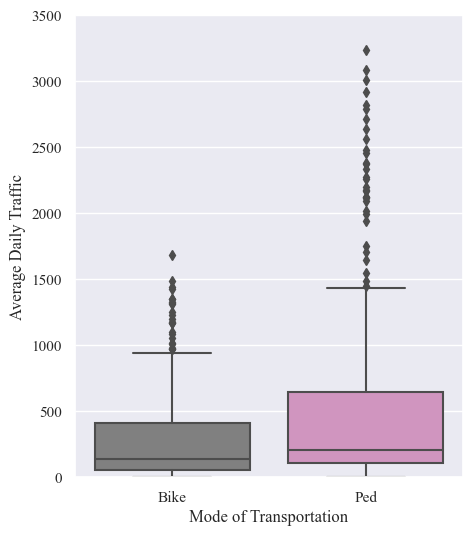

In [124]:

# Box plot of 'daily_count' by 'Mode'
fig, ax=plt.subplots(1, figsize=(5,6))
sns.boxplot(ax=ax,x='Mode', y='daily_count', data=df_ampm[(df_ampm.Mode!="All") & (df_ampm.Mode!="Ant")], palette=['grey', 'C6','C4'])
ax.set_xlabel('Mode of Transportation')
ax.set_ylabel('Average Daily Traffic')
ax.set_ylim(0,3500)
plt.show()

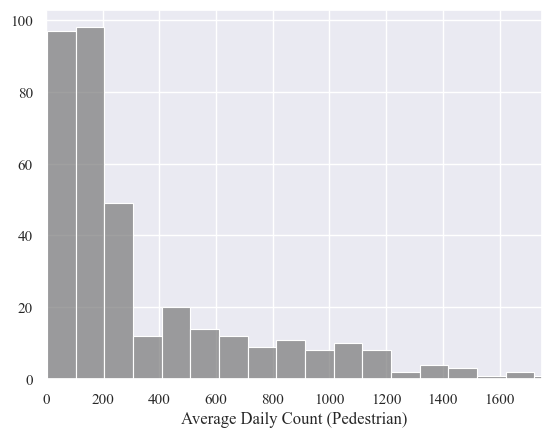

In [77]:
ax=sns.histplot(df_ampm.loc[(df_ampm.Mode=='Ped'),'daily_count'], bins=40,color='grey')
ax.set_xlabel('Average Daily Count (Pedestrian)')
ax.set_xlim(0,1750)
ax.set_ylabel('')
plt.show()

In [134]:
list(df_ampm.columns)

['stationid',
 'year',
 'Mode',
 'ampeak',
 'pmpeak',
 'daily_count',
 'TotPop_1mile',
 'TotPopMale_1mile',
 'TotPopFemale_1mile',
 'Male_5_14_1mile',
 'Male_15_24_1mile',
 'Male_25_34_1mile',
 'Male_35_54_1mile',
 'Male_55_64_1mile',
 'Male_65_over_1mile',
 'Female_5_14_1mile',
 'Female_15_24_1mile',
 'Female_25_34_1mile',
 'Female_35_54_1mile',
 'Female_55_64_1mile',
 'Female_65_over_1mile',
 'Pop_Race_White_1mile',
 'Pop_Race_Black_1mile',
 'Pop_Race_Asian_1mile',
 'Pop_Race_Native_1mile',
 'Pop_Race_Two_1mile',
 'House_1mile',
 'House_Family_1mile',
 'Edu_Bachelor_more_1mile',
 'HHI_less_35_1mile',
 'HHI_35_45_1mile',
 'HHI_45_60_1mile',
 'HHI_60_100_1mile',
 'HHI_100_150_1mile',
 'HHI_150_more_1mile',
 'Income_1mile',
 'TotPop_05miles',
 'TotPopMale_05miles',
 'TotPopFemale_05miles',
 'Male_5_14_05miles',
 'Male_15_24_05miles',
 'Male_25_34_05miles',
 'Male_35_54_05miles',
 'Male_55_64_05miles',
 'Male_65_over_05miles',
 'Female_5_14_05miles',
 'Female_15_24_05miles',
 'Female_25_

#### Landuse (replica)

In [ ]:
df_ampm

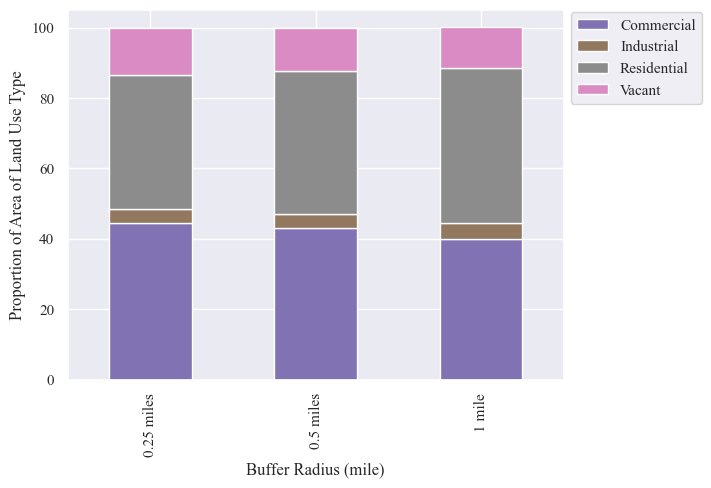

In [134]:
cols=['lu_replica_res_025mile',
 'lu_replica_com_025mile',
 'lu_replica_ind_025mile',
 'lu_replica_vac_025mile',
 'lu_replica_res_05mile',
 'lu_replica_com_05mile',
 'lu_replica_ind_05mile',
 'lu_replica_vac_05mile',
'lu_replica_res_1mile',
 'lu_replica_com_1mile',
 'lu_replica_ind_1mile',
 'lu_replica_vac_1mile'
     ]
df_=df_ampm[cols]
df_melted = df_.melt(var_name="Column", value_name="Density")
df_melted['landuse']=df_melted.Column.str[11:14]
df_melted['Buffer']=df_melted.Column.str[15:]
a=df_melted.groupby(["landuse", "Buffer"], as_index=False).agg({'Density': 'sum'})
#
df_pivot = a.pivot(index='Buffer', columns='landuse', values='Density')

# Calculate percentages for each column in the DataFrame
row_totals = df_pivot.sum(axis=1)
df_percentages = df_pivot.divide(row_totals, axis=0) * 100

# Plot the pivoted and percentage-calculated DataFrame as a stacked bar plot
ax=df_percentages.plot(kind='bar', stacked=True, color=["C4", "C5", "C7", 'C6'])

# Add labels and title to the plot
#plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Proportion of Area of Land Use Type',fontproperties=font_prop)
labelnames=['Commercial', 'Industrial', 'Residential', 'Vacant']
plt.legend(loc='center left', bbox_to_anchor=(1, 0.87), ncol=1, labels=labelnames)


ax.set_xticklabels(['0.25 miles', '0.5 miles', '1 mile'])

# Show plot
plt.show()


In [199]:
print(list(df_ampm.columns))

['stationid', 'year', 'Mode', 'ampeak', 'pmpeak', 'daily_count', 'county', 'Latitude', 'Longitude', 'TotPop_1mile', 'TotPopMale_1mile', 'TotPopFemale_1mile', 'Male_5_14_1mile', 'Male_15_24_1mile', 'Male_25_34_1mile', 'Male_35_54_1mile', 'Male_55_64_1mile', 'Male_65_over_1mile', 'Female_5_14_1mile', 'Female_15_24_1mile', 'Female_25_34_1mile', 'Female_35_54_1mile', 'Female_55_64_1mile', 'Female_65_over_1mile', 'Pop_Race_White_1mile', 'Pop_Race_Black_1mile', 'Pop_Race_Asian_1mile', 'Pop_Race_Native_1mile', 'Pop_Race_Two_1mile', 'House_1mile', 'House_Family_1mile', 'Edu_Bachelor_more_1mile', 'HHI_less_35_1mile', 'HHI_35_45_1mile', 'HHI_45_60_1mile', 'HHI_60_100_1mile', 'HHI_100_150_1mile', 'HHI_150_more_1mile', 'Income_1mile', 'TotPop_05mile', 'TotPopMale_05mile', 'TotPopFemale_05mile', 'Male_5_14_05mile', 'Male_15_24_05mile', 'Male_25_34_05mile', 'Male_35_54_05mile', 'Male_55_64_05mile', 'Male_65_over_05mile', 'Female_5_14_05mile', 'Female_15_24_05mile', 'Female_25_34_05mile', 'Female_35_

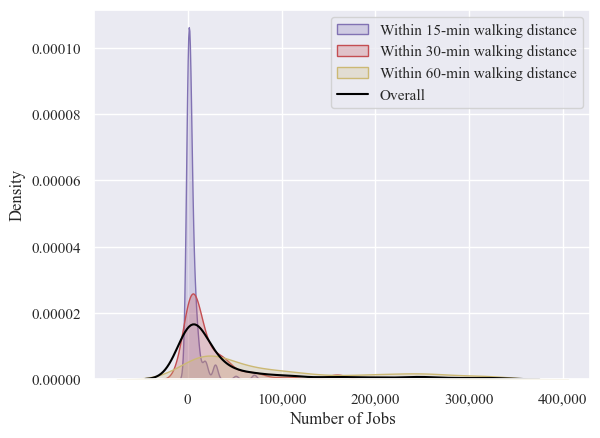

In [200]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
jobs_15min = df_ampm.job_access_15min_walk
jobs_30min = df_ampm.job_access_30min_walk
jobs_60min = df_ampm.job_access_60min_walk
# Combine the data into a single array
jobs_all = np.concatenate((jobs_15min,jobs_30min,jobs_60min))

# Create a kernel density plot
sns.kdeplot(jobs_15min, shade=True, label='Within 15 min', color='C4')
sns.kdeplot(jobs_30min, shade=True, label='Within 30 min', color='C3')
sns.kdeplot(jobs_60min, shade=True, label='Within 60 min', color='C8')
sns.kdeplot(jobs_all, shade=False, color='black')

# Set the chart title and axis labels
#plt.title('Distribution of Job Accessibility')
plt.xlabel('Number of Jobs')
plt.ylabel('Density')
plt.legend(labels=['Within 15-min walking distance','Within 30-min walking distance', 'Within 60-min walking distance', 'Overall'])

# Format x-axis with comma separated numbers
def comma_format(x, _):
    return f'{x:,.0f}'

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(comma_format))

# Display the chart
plt.show()


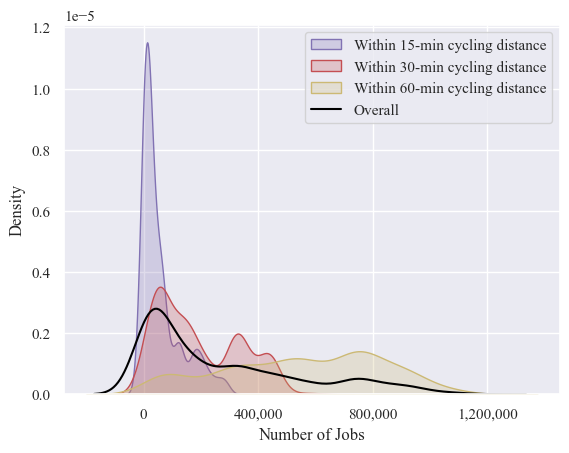

In [195]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

jobs_15min = df_ampm.job_access_15min_bike
jobs_30min = df_ampm.job_access_30min_bike
jobs_60min = df_ampm.job_access_60min_bike
# Combine the data into a single array
jobs_all = np.concatenate((jobs_15min, jobs_30min, jobs_60min))

# Create a kernel density plot
sns.kdeplot(jobs_15min, shade=True, label='Within 15 min', color='C4')
sns.kdeplot(jobs_30min, shade=True, label='Within 30 min', color='C3')
sns.kdeplot(jobs_60min, shade=True, label='Within 60 min', color='C8')
sns.kdeplot(jobs_all, shade=False, color='black')

# Set the chart title and axis labels
#plt.title('Distribution of Job Accessibility')
plt.xlabel('Number of Jobs')
plt.ylabel('Density')
plt.legend(labels=['Within 15-min cycling distance', 'Within 30-min cycling distance', 'Within 60-min cycling distance', 'Overall'])

# Format x-axis with comma separated numbers
def comma_format(x, _):
    return f'{x:,.0f}'

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(comma_format))

# Set x-axis ticks to have only five positive ticks, including 0
ax.xaxis.set_major_locator(MaxNLocator(5))

# Ensure the x-axis starts from 0
#ax.set_xlim(left=0)

# Display the chart
plt.show()


#### Proximity

In [205]:
df_ampm[df_ampm.proximity_water<0]

,stationid,year,Mode,ampeak,pmpeak,daily_count,TotPop_1mile,TotPopMale_1mile,TotPopFemale_1mile,Male_5_14_1mile,...,lu_replica_com_1mile,lu_replica_ind_1mile,lu_replica_vac_1mile,lu_replica_entropy_1mile,ADT_025mile,ADT_05mile,ADT_1mile,ADT_previous_year_025mile,ADT_previous_year_05mile,ADT_previous_year_1mile


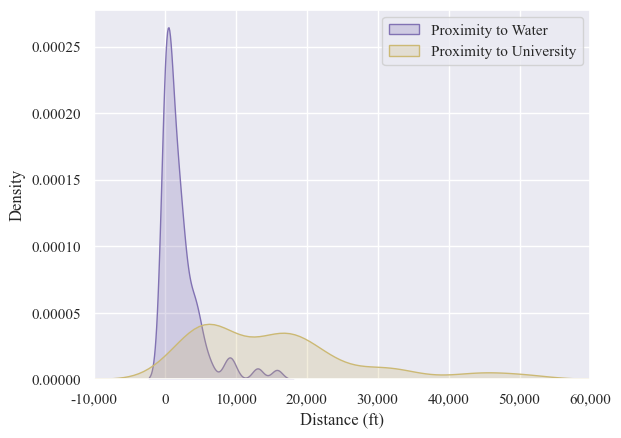

In [193]:
jobs_30min = df_ampm.proximity_water
jobs_60min = df_ampm.proximity_uni

# Combine the data into a single array
jobs_all = np.concatenate((jobs_30min, jobs_60min))

# Create a kernel density plot
sns.kdeplot(jobs_30min, shade=True, label='Within 30 min', color='C4')
sns.kdeplot(jobs_60min, shade=True, label='Within 60 min', color='C8')
#sns.kdeplot(jobs_90min, shade=True, label='Within 60 min', color='C7')

# Set the chart title and axis labels
#plt.title('Distribution of Proximity')
plt.xlabel('Distance (ft)')
def format_with_comma(value, tick_number):
    return f'{value:,.0f}'
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_with_comma))
plt.ylabel('Density')
plt.legend(labels=['Proximity to Water', 'Proximity to University', 'Overall'])
plt.xlim(-10000,60000)
# Display the chart
plt.show()

In [187]:
distances=df_ampm[['proximity_water',
 'proximity_uni',
]]

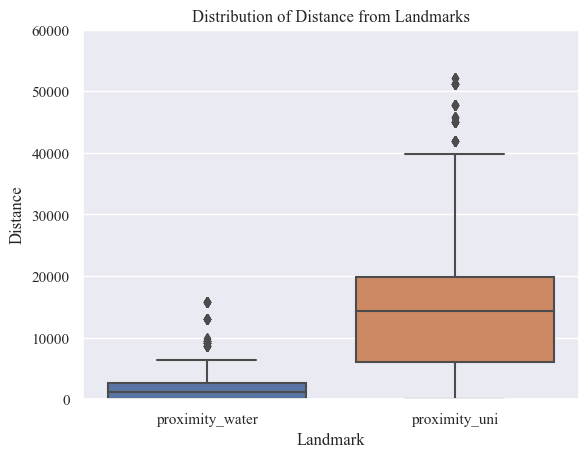

In [190]:
# Melt the data into long format
distances_melted = pd.melt(distances, var_name='Landmark', value_name='Distance')

# Create a box plot
ax=sns.boxplot(x='Landmark', y='Distance', data=distances_melted)

# Set the chart title and axis labels
plt.title('Distribution of Distance from Landmarks')
plt.xlabel('Landmark')
plt.ylabel('Distance')
ax.set_ylim(0,60000)
# Display the chart
plt.show()

#### Weather

In [87]:
df_ampm_=df_ampm[['PRCP','TAVG','TMAX','TMIN','AWND','county']]


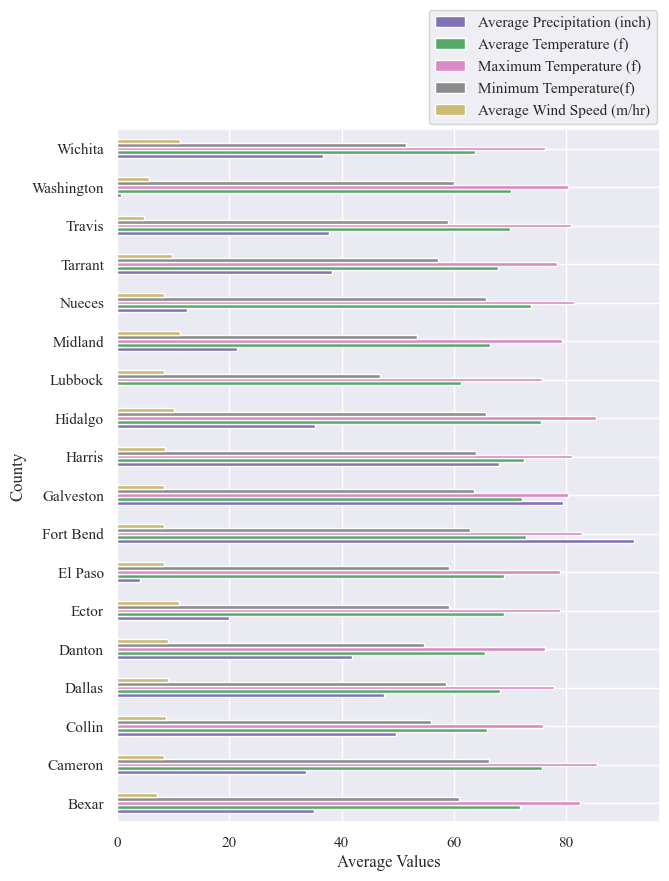

In [109]:
mean_values = df_ampm_.groupby('county').mean()

# Plot a bar chart for each county
fig, ax = plt.subplots(figsize=(7, 9))
mean_values.plot(kind='barh', ax=ax, color=['C4','C2','C6','C7', 'C8'])
ax.set_xlabel("Average Values")
ax.set_ylabel("County")
#ax.set_title("Average Temperature, Max Temperature, Min Temperature, and Average Wind Speed for Each County")
plt.xticks()
labelnames=["Average Precipitation (inch)",'Average Temperature (f)', "Maximum Temperature (f)", "Minimum Temperature(f)", "Average Wind Speed (m/hr)"]
plt.legend(loc='center left', bbox_to_anchor=(0.56, 1.09), ncol=1, labels=labelnames)
plt.show()

In [84]:
print(list(df_ampm.columns))

['stationid', 'year', 'Mode', 'ampeak', 'pmpeak', 'daily_count', 'TotPop_1mile', 'TotPopMale_1mile', 'TotPopFemale_1mile', 'Male_5_14_1mile', 'Male_15_24_1mile', 'Male_25_34_1mile', 'Male_35_54_1mile', 'Male_55_64_1mile', 'Male_65_over_1mile', 'Female_5_14_1mile', 'Female_15_24_1mile', 'Female_25_34_1mile', 'Female_35_54_1mile', 'Female_55_64_1mile', 'Female_65_over_1mile', 'Pop_Race_White_1mile', 'Pop_Race_Black_1mile', 'Pop_Race_Asian_1mile', 'Pop_Race_Native_1mile', 'Pop_Race_Two_1mile', 'House_1mile', 'House_Family_1mile', 'Edu_Bachelor_more_1mile', 'HHI_less_35_1mile', 'HHI_35_45_1mile', 'HHI_45_60_1mile', 'HHI_60_100_1mile', 'HHI_100_150_1mile', 'HHI_150_more_1mile', 'Income_1mile', 'TotPop_05miles', 'TotPopMale_05miles', 'TotPopFemale_05miles', 'Male_5_14_05miles', 'Male_15_24_05miles', 'Male_25_34_05miles', 'Male_35_54_05miles', 'Male_55_64_05miles', 'Male_65_over_05miles', 'Female_5_14_05miles', 'Female_15_24_05miles', 'Female_25_34_05miles', 'Female_35_54_05miles', 'Female_55

In [ ]:
df_ampm[['TotPop_1mile','TotPopMale_1mile','House_1mile','Edu_Bachelor_more_1mile','Income_1mile']]

In [276]:
df_melted

,Column,Density,landuse,Buffer
0,TotPopMale_025miles,178.94628,TotPopMale,miles
1,TotPopMale_025miles,178.94628,TotPopMale,miles
2,TotPopMale_025miles,184.96146,TotPopMale,miles
3,TotPopMale_025miles,184.96146,TotPopMale,miles
4,TotPopMale_025miles,152.98729,TotPopMale,miles
...,...,...,...,...
7813,TotPopFemale_1mile,12617.53177,TotPopFema,1mile
7814,TotPopFemale_1mile,2499.77394,TotPopFema,1mile
7815,TotPopFemale_1mile,7435.69823,TotPopFema,1mile
7816,TotPopFemale_1mile,53.28628,TotPopFema,1mile


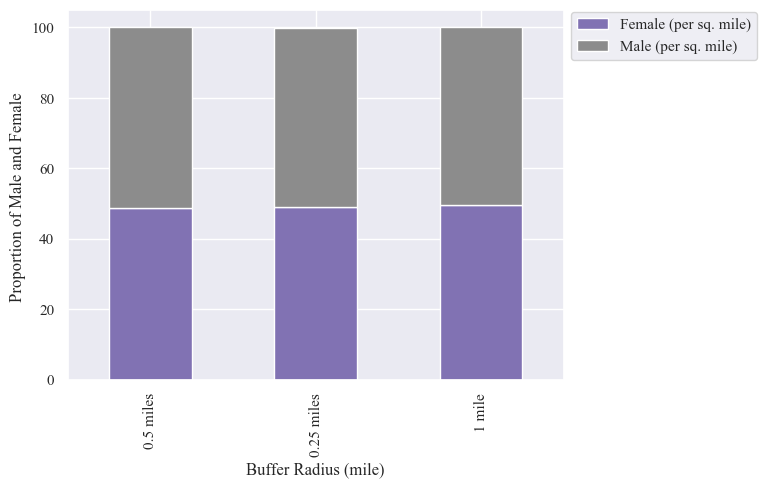

In [133]:
cols=['TotPopMale_025miles',
 'TotPopFemale_025miles',
 'TotPopMale_05miles',
 'TotPopFemale_05miles',
 'TotPopMale_1mile',
 'TotPopFemale_1mile',    
     ]
df_=df_ampm[cols]
df_melted = df_.melt(var_name="Column", value_name="Density")
df_melted['landuse']=df_melted.Column.str[0:10]
df_melted['Buffer']=df_melted.Column.str[-7:]
a=df_melted.groupby(["landuse", "Buffer"], as_index=False).agg({'Density': 'sum'})
#
df_pivot = a.pivot(index='Buffer', columns='landuse', values='Density')

# Calculate percentages for each column in the DataFrame
row_totals = df_pivot.sum(axis=1)
df_percentages = df_pivot.divide(row_totals, axis=0) * 100

# Plot the pivoted and percentage-calculated DataFrame as a stacked bar plot
ax=df_percentages.plot(kind='bar', stacked=True, color=["C4", "C7", "C7", 'C6'])

# Add labels and title to the plot
#plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Proportion of Male and Female ',fontproperties=font_prop)
labelnames=['Female (per sq. mile)', 'Male (per sq. mile)']
plt.legend(loc='center left', bbox_to_anchor=(1, 0.93), ncol=1,labels=labelnames)


ax.set_xticklabels(['0.5 miles', '0.25 miles', '1 mile'])

# Show plot
plt.show()

##### Ethnicity

In [311]:
df_melted.Column.str.split('_').str[2]

0        White
1        White
2        White
3        White
4        White
         ...  
19540      Two
19541      Two
19542      Two
19543      Two
19544      Two
Name: Column, Length: 19545, dtype: object

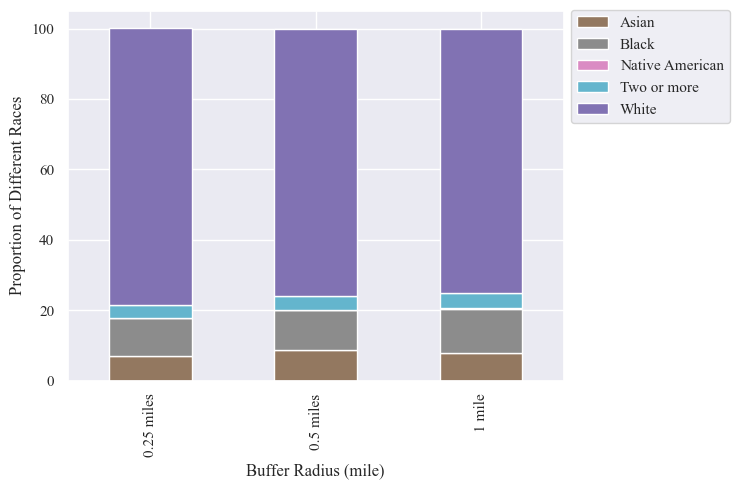

In [179]:
cols=['Pop_Race_White_1mile',
 'Pop_Race_Black_1mile',
 'Pop_Race_Asian_1mile',
 'Pop_Race_Native_1mile',
 'Pop_Race_Two_1mile',
'Pop_Race_White_05mile',
 'Pop_Race_Black_05mile',
 'Pop_Race_Asian_05mile',
 'Pop_Race_Native_05mile',
 'Pop_Race_Two_05mile',
    'Pop_Race_White_025mile',
 'Pop_Race_Black_025mile',
 'Pop_Race_Asian_025mile',
 'Pop_Race_Native_025mile',
 'Pop_Race_Two_025mile'
     ]
df_=df_ampm[cols]

df_melted = df_.melt(var_name="Column", value_name="Density")
df_melted['landuse']=df_melted.Column.str.split('_').str[2]
df_melted['Buffer']=df_melted.Column.str.split('_').str[-1]
a=df_melted.groupby(["landuse", "Buffer"], as_index=False).agg({'Density': 'sum'})
#
df_pivot = a.pivot(index='Buffer', columns='landuse', values='Density')

# Calculate percentages for each column in the DataFrame
row_totals = df_pivot.sum(axis=1)
df_percentages = df_pivot.divide(row_totals, axis=0) * 100

# Plot the pivoted and percentage-calculated DataFrame as a stacked bar plot
ax=df_percentages.plot(kind='bar', stacked=True, color=["C5", 'C7',"C6" ,'C9','C4','C8',])

# Add labels and title to the plot
#plt.xticks(range(len(labels)), labels)
plt.xlabel('Buffer Radius (mile)',fontproperties=font_prop)
plt.ylabel('Proportion of Different Races',fontproperties=font_prop)
labelnames=['Female (per sq. mile)', 'Male (per sq. mile)']
lbs=['Asian', 'Black', 'Native American', 'Two or more', 'White']
plt.legend(loc='center left', bbox_to_anchor=(1, 0.85), ncol=1, labels=lbs)


ax.set_xticklabels(['0.25 miles', '0.5 miles', '1 mile'])

# Show plot
plt.show()

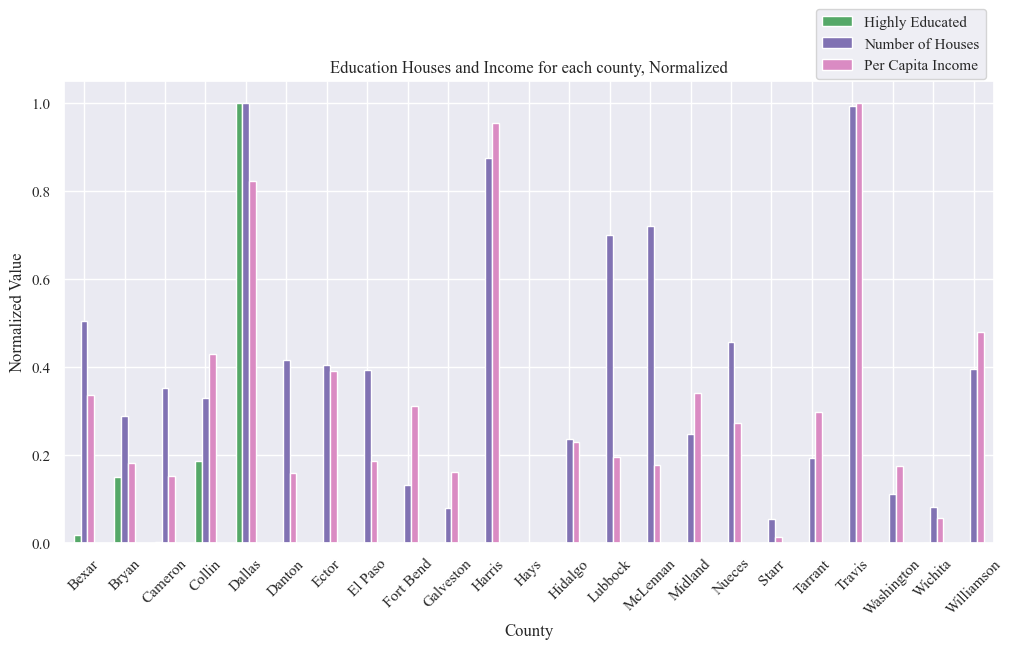

In [371]:
#Landuse folder: The location of all land use data used for calculation is Data>Landuse>All landuse. The name of the county landuse data folders are coded, if the last word of the folder has “County” then the data is downloaded from TNRIS and if the last word of the folder has “C” then it is downloaded from tax appraisal office. If the last word of the folder is neither “C” nor “County” then it is downloaded from open city data.
# from sklearn.preprocessing import MinMaxScaler
# mean_values = df_ampm__.groupby('county').mean()
# scaler=MinMaxScaler()
# mean_values=pd.DataFrame(scaler.fit_transform(mean_values), columns=mean_values.columns, index=mean_values.index)
# # Plot a bar chart for each county
# fig, ax = plt.subplots(figsize=(12, 6))
# mean_values.plot(kind='bar', ax=ax, color=['C2','C4','C6','C7'])
# ax.set_xlabel("County")
# ax.set_ylabel("Normalized Value")
# ax.set_title("Education Houses and Income for each county, Normalized")
# plt.xticks(rotation=45)
# labelnames=['Highly Educated',"Number of Houses", 'Per Capita Income']
# plt.legend(loc='center left', bbox_to_anchor=(0.8,1.08), ncol=1, labels=labelnames)
           
# plt.show()

#### hOme

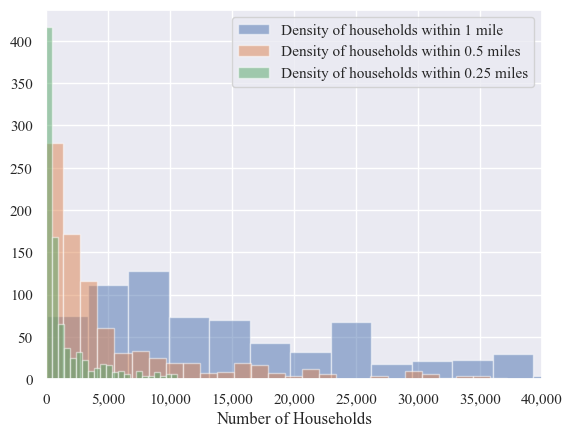

In [234]:
from matplotlib.ticker import FuncFormatter
variables = ['House_1mile', 'House_05mile', 'House_025mile']

# Set the number of bins for the histograms
n_bins = 100

# Create a for loop to plot the histograms
for i in range(len(variables)):
    # Create a histogram for the current variable
    plt.hist(df_ampm[variables[i]], bins=n_bins, alpha=0.5, label=variables[i])

# Set the x-axis label and plot title
plt.xlabel("Number of Households")
#plt.title("Overlapping Histograms for different size of buffer")
# Function to format x-tick labels with commas
def format_with_comma(value, tick_number):
    return f'{value:,.0f}'

# Apply the FuncFormatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_with_comma))

# Add a legend to the plot
plt.xlim(0,40000)
lbl=['Density of households within 1 mile', 'Density of households within 0.5 miles', 'Density of households within 0.25 miles']
plt.legend(loc='upper right',labels=lbl)
plt.show()

#### Education

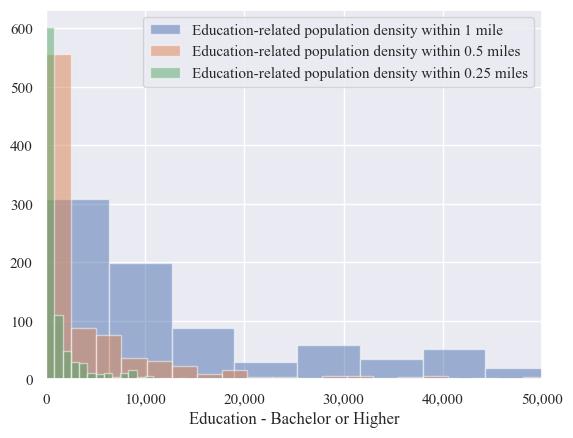

In [175]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

variables = ['Edu_Bachelor_more_1mile', 'Edu_Bachelor_more_05mile', 'Edu_Bachelor_more_025mile']

# Set the number of bins for the histograms
n_bins = 50

# Create a for loop to plot the histograms
for i in range(len(variables)):
    # Create a histogram for the current variable
    plt.hist(df_ampm[variables[i]], bins=n_bins, alpha=0.5, label=variables[i])

# Set the x-axis label and plot title
plt.xlabel("Education - Bachelor or Higher")
#plt.title("Overlapping Histograms for different size of buffer")

# Add a legend to the plot
plt.xlim(0,50000)
lbl=['Education-related population density within 1 mile', 'Education-related population density within 0.5 miles', 'Education-related population density within 0.25 miles']
plt.legend(loc='upper right', labels=lbl)

# Function to format x-tick labels with commas
def format_with_comma(value, tick_number):
    return f'{value:,.0f}'

# Apply the FuncFormatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_with_comma))

plt.show()


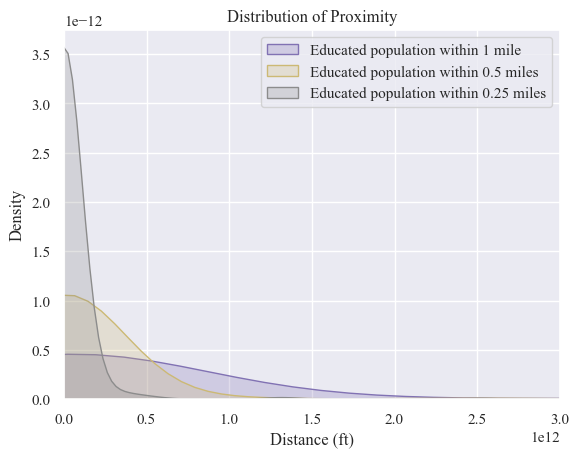

In [68]:
jobs_30min = df_ampm.Edu_Bachelor_more_1mile
jobs_60min = df_ampm.Edu_Bachelor_more_05miles
jobs_90min = df_ampm.Edu_Bachelor_more_025miles
# Combine the data into a single array
jobs_all = np.concatenate((jobs_30min, jobs_60min))

# Create a kernel density plot
sns.kdeplot(jobs_30min, shade=True, label='Within 30 min', color='C4')
sns.kdeplot(jobs_60min, shade=True, label='Within 60 min', color='C8')
sns.kdeplot(jobs_90min, shade=True, label='Within 60 min', color='C7')

# Set the chart title and axis labels
plt.title('Distribution of Proximity')
plt.xlabel('Distance (ft)')
plt.ylabel('Density')
plt.legend(labels=['Educated population within 1 mile', 'Educated population within 0.5 miles', 'Educated population within 0.25 miles'])
plt.xlim(00000000000,3000000000000)
# Display the chart
plt.show()

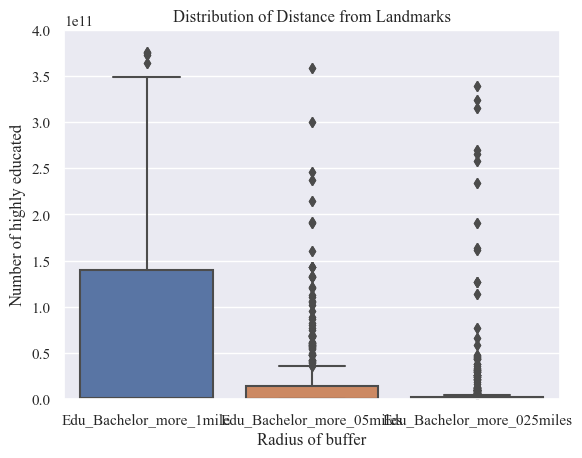

In [51]:
mt = df_ampm[['Edu_Bachelor_more_1mile', 'Edu_Bachelor_more_05miles', 'Edu_Bachelor_more_025miles']]
# Melt the data into long format
distances_melted = pd.melt(mt, var_name='radius', value_name='Number of highly educated')

# Create a box plot
ax=sns.boxplot(x='radius', y='Number of highly educated', data=distances_melted)

# Set the chart title and axis labels
plt.title('Distribution of Distance from Landmarks')
plt.xlabel('Radius of buffer')
plt.ylabel('Number of highly educated')
ax.set_ylim(0,400000000000)
# Display the chart
plt.show()

#### Income
 https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx

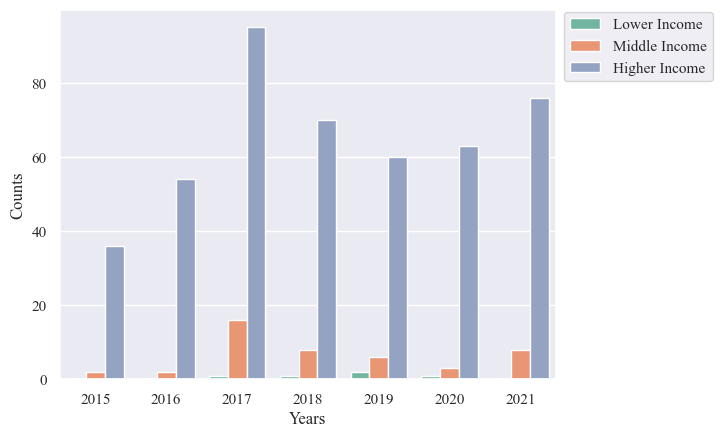

In [180]:
#making dublicates
df_ampm_=df_ampm.copy(deep=True)

income_categories = ['Lower Income', 'Middle Income', 'Higher Income']
# Define the income category bins
income_bins = [0, 30000, 90000, df_ampm_['Income_1mile'].max()]
# Categorize the incomes using pd.cut() and the above bins
df_ampm_['income_category'] = pd.cut(df_ampm_['Income_1mile'], bins=income_bins, labels=income_categories)
#Only select stations and year
A=df_ampm_[['stationid','year','Income_1mile','income_category']]
A=A.groupby(['stationid', 'year'], as_index=False).agg({"income_category":"first"})
# Create a barplot using sns

ax = sns.countplot(x='year',hue='income_category', data=A, palette='Set2')

# Set the labels and title of the plot
ax.set_xlabel("Years")
ax.set_ylabel("Counts")
#ax.set_title("Income distribution in around SUP count station over the years")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), ncol=1)


# Show the plot
plt.show()

### Comparing Two Land use data

In [314]:
df_ampm12=pd.read_excel("Data/Temp/FULL_prepared_data_ampm_SUP_v12.xlsx")


##### Normalizing land use data

In [315]:
lucols=['lu_replica_res_025mile', 'lu_replica_com_025mile',
       'lu_replica_ind_025mile', 'lu_replica_vac_025mile',
       'lu_replica_entropy_025mile',  'lu_replica_res_05mile',
       'lu_replica_com_05mile', 'lu_replica_ind_05mile',
       'lu_replica_vac_05mile', 'lu_replica_entropy_05mile',
       'lu_replica_res_1mile', 'lu_replica_com_1mile', 'lu_replica_ind_1mile',
       'lu_replica_vac_1mile', 'lu_replica_entropy_1mile',
       'lu_local_res_025mile', 'lu_local_com_025mile',
       'lu_local_ind_025mile', 'lu_local_vac_025mile',
       'lu_local_entropy_025mile',  'lu_local_res_05mile',
       'lu_local_com_05mile', 'lu_local_ind_05mile',
       'lu_local_vac_05mile', 'lu_local_entropy_05mile', 
       'lu_local_res_1mile', 'lu_local_com_1mile', 'lu_local_ind_1mile',
       'lu_local_vac_1mile', 'lu_local_entropy_1mile',]
df=df_ampm12[lucols]

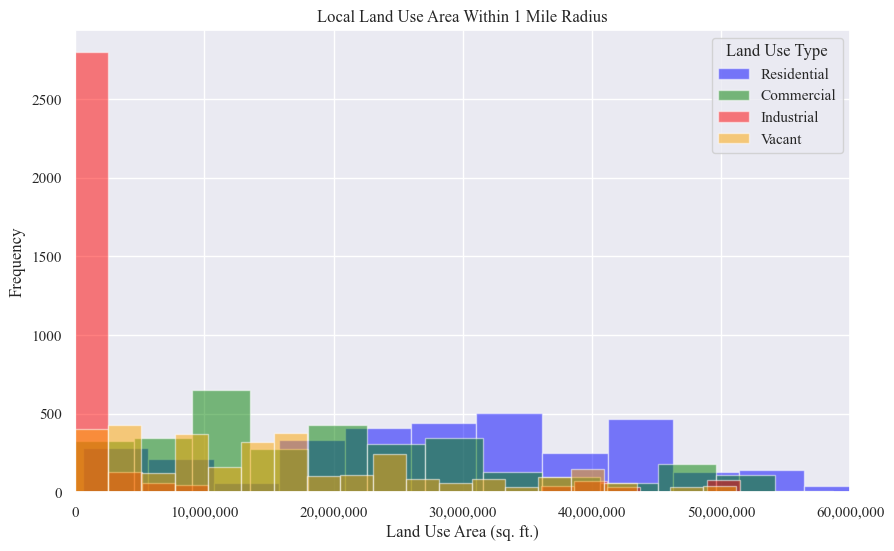

In [325]:
import matplotlib.ticker as ticker
land_use_types = ['res', 'com', 'ind', 'vac']
colors = ['blue', 'green', 'red', 'orange']
buffer = '1mile'  # can change this to '025mile' , '05mile' or '1mile' as needed
source = 'local'  # can change this to 'local' or 'replica' if needed
land_use_names = {
    'res': 'Residential',
    'com': 'Commercial',
    'ind': 'Industrial',
    'vac': 'Vacant'
}
plt.figure(figsize=(10, 6))

for i, lu_type in enumerate(land_use_types):
    plt.hist(df[f'lu_{source}_{lu_type}_{buffer}'], bins=20, alpha=0.5, color=colors[i], label=land_use_names[lu_type])
plt.xlim(0,60000000) #5,000,000 for 025, 15,000,000 for 05 and 50,000,000 for 1
plt.title(f'{source.capitalize()} Land Use Area Within 1 Mile Radius')
plt.xlabel('Land Use Area (sq. ft.)')
plt.ylabel('Frequency')
plt.legend(title='Land Use Type')
# Use custom tick formatter to display full numbers with commas
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.show()


#### Making Landuse descriptive variable table

In [326]:
lucols=['lu_replica_res_025mile', 'lu_replica_com_025mile',
       'lu_replica_ind_025mile', 'lu_replica_vac_025mile',
       'lu_replica_entropy_025mile',  'lu_replica_res_05mile',
       'lu_replica_com_05mile', 'lu_replica_ind_05mile',
       'lu_replica_vac_05mile', 'lu_replica_entropy_05mile',
       'lu_replica_res_1mile', 'lu_replica_com_1mile', 'lu_replica_ind_1mile',
       'lu_replica_vac_1mile', 'lu_replica_entropy_1mile',
       'lu_local_res_025mile', 'lu_local_com_025mile',
       'lu_local_ind_025mile', 'lu_local_vac_025mile',
       'lu_local_entropy_025mile',  'lu_local_res_05mile',
       'lu_local_com_05mile', 'lu_local_ind_05mile',
       'lu_local_vac_05mile', 'lu_local_entropy_05mile', 
       'lu_local_res_1mile', 'lu_local_com_1mile', 'lu_local_ind_1mile',
       'lu_local_vac_1mile', 'lu_local_entropy_1mile','county']
df=df_ampm12[lucols]

In [360]:
one_mile_columns = [col for col in df.columns if '_1mile' in col]

# Group the dataset by 'county' and calculate mean and standard deviation for each group
mean_sd_by_county = df.groupby('county')[one_mile_columns].agg(['mean', 'std'])
mean_sd_by_county.iloc[:,0:]=round(mean_sd_by_county.iloc[:,0:],1)
# Rename the columns to have the land use type as the column name
mean_sd_by_county.columns = mean_sd_by_county.columns.map('_'.join)
mean_sd_by_county.reset_index(inplace=True)

# Create a new DataFrame with the desired structure
result = pd.DataFrame(columns=['County'])

# Fill the new DataFrame with the calculated values
result['County'] = mean_sd_by_county['county']
result['Replica Res'] = mean_sd_by_county['lu_replica_res_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_replica_res_1mile_std'].astype(str) + ")"
result['Replica Com'] = mean_sd_by_county['lu_replica_com_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_replica_com_1mile_std'].astype(str) + ")"
result['Replica Ind'] = mean_sd_by_county['lu_replica_ind_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_replica_ind_1mile_std'].astype(str) + ")"
result['Replica Vac'] = mean_sd_by_county['lu_replica_vac_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_replica_vac_1mile_std'].astype(str) + ")"
result['Local Res'] = mean_sd_by_county['lu_local_res_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_local_res_1mile_std'].astype(str) + ")"
result['Local Com'] = mean_sd_by_county['lu_local_com_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_local_com_1mile_std'].astype(str) + ")"
result['Local Ind'] = mean_sd_by_county['lu_local_ind_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_local_ind_1mile_std'].astype(str) + ")"
result['Local Vac'] = mean_sd_by_county['lu_local_vac_1mile_mean'].astype(str) + " (" + mean_sd_by_county['lu_local_vac_1mile_std'].astype(str) + ")"
result.to_csv("Data/Temp/landuse_descriptive_table_county_1mile.csv")

##### Getting average daily count for each city

In [516]:
st=pd.read_csv("Data/BPCX data from Phil/stations as of 202212211541.csv")
st_cty=st[['station_id_tmg','city_area']].drop_duplicates()

In [537]:
#Overall
a=df_ampm
#db=a.groupby(['county']).agg({'stationid':'first'}).reset_index()
cb=a.groupby(['stationid']).agg({"county":'first','daily_count':np.mean}).reset_index()
c=cb[['stationid','daily_count','county']] #the daily count is avg over stationid
e=c.merge(st_cty, right_on='station_id_tmg', left_on='stationid', how='left')
g=e.groupby(['city_area']).agg({'county':'first','daily_count':np.mean, 'stationid':'count'}) #we can change the groupby variable to get avg daily count for city or county
#Bic
a=df_ampm[df_ampm.Mode=='Bic']
#db=a.groupby(['county']).agg({'stationid':'first'}).reset_index()
cb=a.groupby(['stationid']).agg({"county":'first','daily_count':np.mean}).reset_index()
c=cb[['stationid','daily_count','county']] #the daily count is avg over stationid
e=c.merge(st_cty, right_on='station_id_tmg', left_on='stationid', how='left')
h=e.groupby(['city_area']).agg({'county':'first','daily_count':np.mean, 'stationid':'count'}) #we can change the groupby variable to get avg daily count for city or county
#BPed
a=df_ampm[df_ampm.Mode=='Ped']
#db=a.groupby(['county']).agg({'stationid':'first'}).reset_index()
cb=a.groupby(['stationid']).agg({"county":'first','daily_count':np.mean}).reset_index()
c=cb[['stationid','daily_count','county']] #the daily count is avg over stationid
e=c.merge(st_cty, right_on='station_id_tmg', left_on='stationid', how='left')
i=e.groupby(['city_area']).agg({'county':'first','daily_count':np.mean, 'stationid':'count'}) #we can change the groupby variable to get avg daily count for city or county
#All
a=df_ampm[df_ampm.Mode=='All']
#db=a.groupby(['county']).agg({'stationid':'first'}).reset_index()
cb=a.groupby(['stationid']).agg({"county":'first','daily_count':np.mean}).reset_index()
c=cb[['stationid','daily_count','county']] #the daily count is avg over stationid
e=c.merge(st_cty, right_on='station_id_tmg', left_on='stationid', how='left')
j=e.groupby(['city_area']).agg({'county':'first','daily_count':np.mean, 'stationid':'count'}) #we can change the groupby variable to get avg daily count for city or county


In [543]:
df = g.merge(h, on='city_area', how='outer',suffixes=('_overal', '_bic'))
df = df.merge(i, on='city_area', how='outer',suffixes=('h', '_ped'))
df = df.merge(j, on='city_area', how='outer',suffixes=('', '_all'))
dff=df[['county_overal','stationid_overal','daily_count_bic','daily_count','daily_count_all']].round(3)
dff.to_csv("Data/Temp/city_and_count_overall.csv")

#### Making a county graph with number of station

In [219]:
# Read the shapefile
counties = gpd.read_file('Data/tl_2019_us_county/tl_2019_us_county.shp')

# Filter the data to include only Texas counties
texas_counties = counties[counties['STATEFP'] == '48']

In [220]:
#  dataset containing count locations and their coordinates
dataset=df_ampm.groupby(['stationid']).agg({'Latitude':'first','Longitude':'first'})


#  'sjoin' function from geopandas to find which counties have count locations
point_data = gpd.GeoDataFrame(dataset, geometry=gpd.points_from_xy(dataset.Longitude, dataset.Latitude))
point_data.crs = texas_counties.crs
points_in_counties = gpd.sjoin(texas_counties, point_data, how='inner', op='intersects')
points_count = points_in_counties.groupby('NAME').size().reset_index(name='num_points')

# Merge the point count with Texas counties data
texas_counties = texas_counties.merge(points_count, on='NAME', how='left')


In [235]:
texas_counties.num_points=texas_counties.num_points.astype(int)

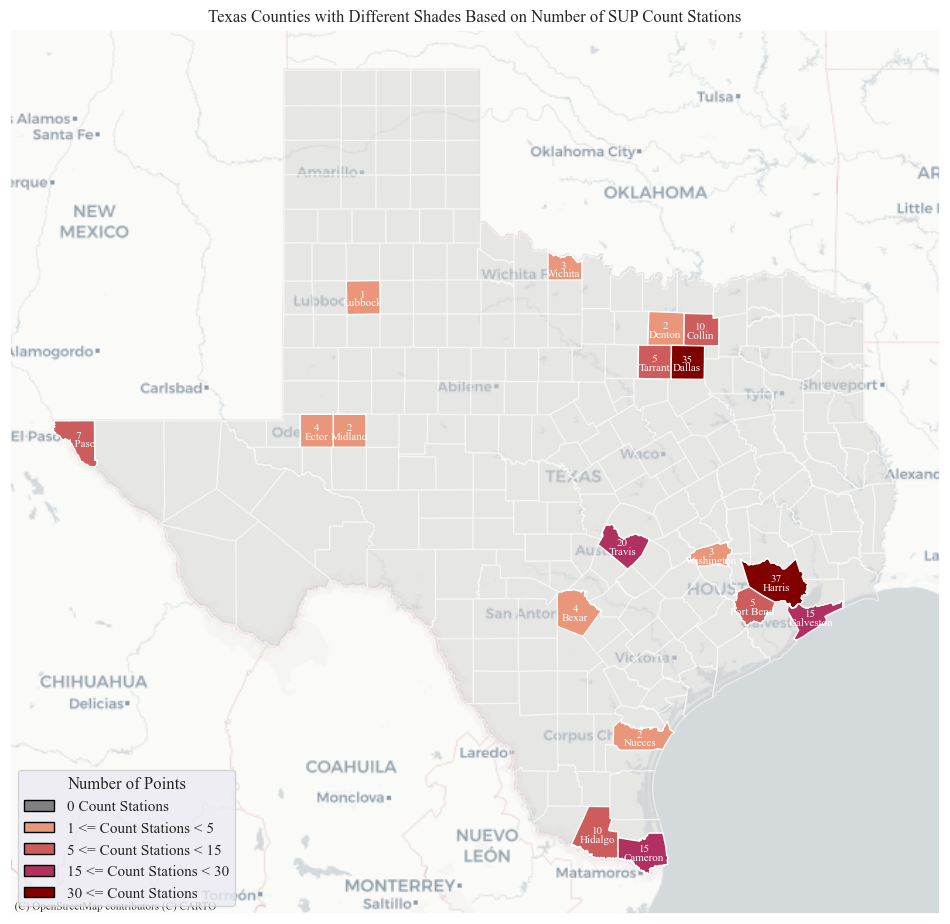

In [237]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPolygon, MultiLineString
from matplotlib.patches import Patch
import contextily as ctx

texas_counties.num_points = texas_counties.num_points.fillna(0)

# Set the style of the map
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect('equal')
ax.set_facecolor('white')

def get_fill_color(num_points):
    if num_points == 0 :
        return "lightgrey"
    elif 1 <= num_points < 5:
        return '#e9967a'
    elif 5 <= num_points < 15:
        return '#cd5c5c'
    elif 15 <= num_points < 30:
        return '#b03060'
    else:
        return "#800000"

# Fill Texas counties with different shades of maroon based on the number of points
for idx, row in texas_counties.iterrows():
    num_points = row['num_points']
    fill_color = get_fill_color(num_points)
    if fill_color == 'lightgrey':
        gpd.GeoSeries(row['geometry']).plot(ax=ax, color=fill_color, alpha=0.5)
    else:
        gpd.GeoSeries(row['geometry']).plot(ax=ax, color=fill_color)                    
    # Write the number of points and name on each county (count>0)
    if num_points > 0:
        label_position = row['geometry'].centroid
        plt.annotate(
            text=str(num_points),
            xy=(label_position.x, label_position.y),
            ha='center',
            fontsize=8,
            color='white'
        )
        
        # Display the county name below the number of points
        county_name = row['NAME']
        plt.annotate(
        text=str(county_name),
        xy=(label_position.x, label_position.y - 15000),
        ha='center',
        fontsize=8,
        color='white')
       

    

# Create a single geometry for the Texas state boundary
texas_boundary = texas_counties.unary_union.convex_hull

# Add the basemap using contextily
texas_counties = texas_counties.to_crs(epsg=3857)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Add title
plt.title('Texas Counties with Different Shades Based on Number of SUP Count Stations')

# Create legend
legend_elements = [
    Patch(facecolor='grey', edgecolor='black', label='0 Count Stations'),
    Patch(facecolor='#e9967a', edgecolor='black', label='1 <= Count Stations < 5'),
    Patch(facecolor='#cd5c5c', edgecolor='black', label='5 <= Count Stations < 15'),
    Patch(facecolor='#b03060', edgecolor='black', label='15 <= Count Stations < 30'),
    Patch(facecolor="#800000", edgecolor='black', label='30 <= Count Stations')
]
ax.legend(handles=legend_elements, title='Number of Points', loc='lower left')
ax.set_xticks([])
ax.set_yticks([])
plt.show()


#### Descriptive Stastical Table

In [121]:
df_ampm.TotPop_1mile.describe()

count       892.000000
mean      67476.428336
std       73867.977580
min         222.444060
25%       18684.199692
50%       41420.738565
75%       87426.628330
max      481424.221820
Name: TotPop_1mile, dtype: float64

In [123]:
results = []

# Loop over each column in the dataframe
for col in df_ampm.select_dtypes(include=['number']).columns:
    # Compute the maximum, minimum, mean, and standard deviation for the current column
    col_max = df_ampm[col].max()
    col_min = df_ampm[col].min()
    col_mean = df_ampm[col].mean()
    col_std = df_ampm[col].std()
    
    # Append the results to the list
    results.append((col, f"{col_min:.2f}/{col_max:.2f}", f"{col_mean:.2f} ({col_std:.2f})"))

# Create a new dataframe from the results list
results_df = pd.DataFrame(results, columns=['Attribute Name', 'Min/ Max', 'Mean (SD)'])



                Attribute Name         Min/ Max        Mean (SD)
0                         year  2015.00/2021.00   2018.29 (1.87)
1                       ampeak      0.00/716.55    61.52 (90.91)
2                       pmpeak      0.00/674.34    60.62 (90.38)
3                  daily_count     0.86/4050.64  390.18 (561.53)
4                     Latitude      25.91/33.92     31.77 (1.76)
..                         ...              ...              ...
176                 ADT_05mile          nan/nan        nan (nan)
177                  ADT_1mile          nan/nan        nan (nan)
178  ADT_previous_year_025mile          nan/nan        nan (nan)
179   ADT_previous_year_05mile          nan/nan        nan (nan)
180    ADT_previous_year_1mile          nan/nan        nan (nan)

[181 rows x 3 columns]


In [125]:
results_df.to_csv("Data/Temp/descriptive_information_raw.csv")

In [135]:
df_ampm.UI_1mile.describe()

count    5.100000e+02
mean     2.794880e-04
std      2.066363e-04
min      6.024701e-07
25%      1.209705e-04
50%      2.326762e-04
75%      3.908830e-04
max      1.132265e-03
Name: UI_1mile, dtype: float64

#### Feature imp (not used)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
def ampm_FeaImp(df, y_variable, title):

    X = df.drop(['ampeak','pmpeak','daily_count','stationid','year','Mode','remark','remark_2' ,'lu_replica'], axis=1)
    y = df[y_variable]
    model = RandomForestRegressor(random_state=0)
    model.fit(X, y)
    importances = model.feature_importances_
    features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    features = features.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=features[0:10])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(title)


In [ ]:
df_ampm.lu_replica_coded=df_ampm.lu_replica.astype('category').cat.codes
df_ampm=df_ampm.fillna(0)

In [87]:
df_ampm_bike=df_ampm[(df_ampm.Mode=="Bic")]
df_ampm_ped=df_ampm[(df_ampm.Mode=="Ped")]

##### Manually change for AM, PM, Bic and Ped and combined

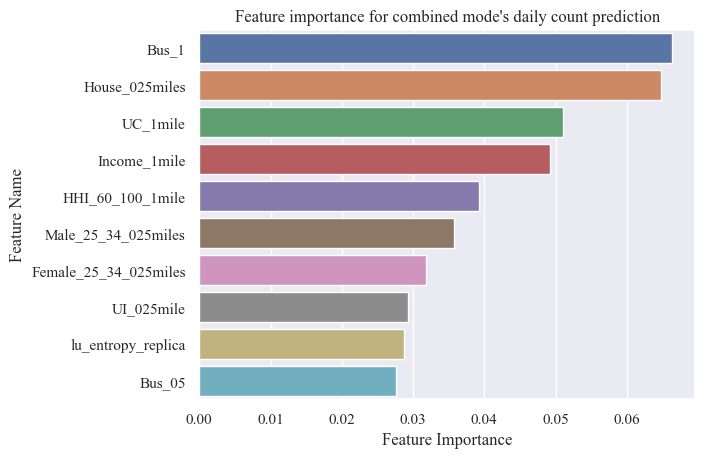

In [98]:
my_title="Feature importance for combined mode's daily count prediction"
ampm_FeaImp(df_ampm,y_variable="daily_count", title=my_title)

### RF feature importance

In [5]:
len(df.stationid.unique())

89

In [26]:
df_bike=df[df.Mode=='Bic']
df_ped=df[df.Mode=='Ped']

In [27]:
from sklearn.ensemble import RandomForestRegressor
def FeaImp(df):
    X = df.drop("count", axis=1)
    y = df["count"]
    model = RandomForestRegressor(random_state=0)
    model.fit(X, y)
    importances = model.feature_importances_
    features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    features = features.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=features[0:10])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title('Feature Importance Plot')

In [28]:
a=df_bike.groupby(["stationid", "year"], as_index=False).agg({'count': 'sum'})

In [29]:
m = pd.merge(a, df_bike, on=['stationid', 'year'])
m=m[(m.hour==0) & (m.direction)] #Here the merge adds the total count (count for each station for each year) to the dataset so we just need one hour
m.drop(["hour", "count_y", "direction","flowid_txdot"],axis=1, inplace=True)
m=m.rename(columns={"count_x":"count"})                #Since hour and hourcount and direction and flow_txdot is not needed now we delete them
m=m.drop_duplicates() #since there will be two or three of the same row with different direction. But the direction is already added while we groupbyed so deleting dublicates in abscense of direction column.
df_bike_=m.reset_index(drop=True)
df_bike_.drop(["stationid", "Mode",'remark', 'remark_2'], axis=1,inplace=True)
df_bike_.year=df_bike_.year.astype(int)
df_bike_=df_bike_.fillna(0)

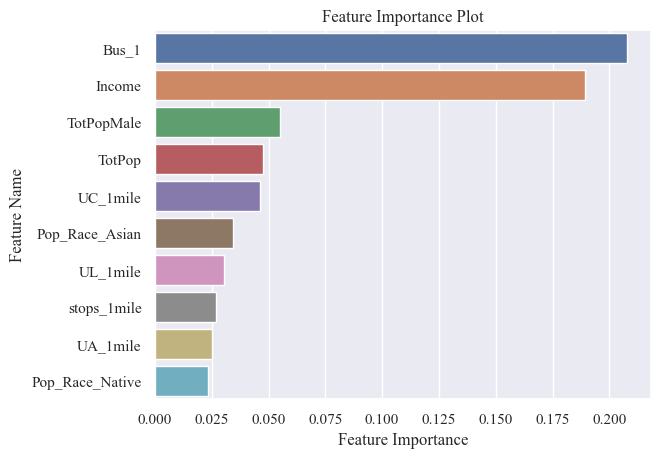

In [430]:
FeaImp(df_bike_)

In [392]:
len(m.stationid.unique())

57

In [433]:
b=df_ped.groupby(["stationid", "year"], as_index=False).agg({'count': 'sum'})

m = pd.merge(b, df_ped, on=['stationid', 'year'])
m=m[(m.hour==0) & (m.direction)] #Here the merge adds the total count (count for each station for each year) to the dataset so we just need one hour
m.drop(["hour", "count_y", "direction","flowid_txdot"],axis=1, inplace=True)
m=m.rename(columns={"count_x":"count"})                #Since hour and hourcount and direction and flow_txdot is not needed now we delete them
m=m.drop_duplicates() #since there will be two or three of the same row with different direction. But the direction is already added while we groupbyed so deleting dublicates in abscense of direction column.
df_ped_=m.reset_index(drop=True)
#For model training
df_ped_.drop(["stationid", "Mode",'remark', 'remark_2'], axis=1,inplace=True) 
df_ped_.year=df_ped_.year.astype(int)
df_ped_=df_ped_.fillna(0)

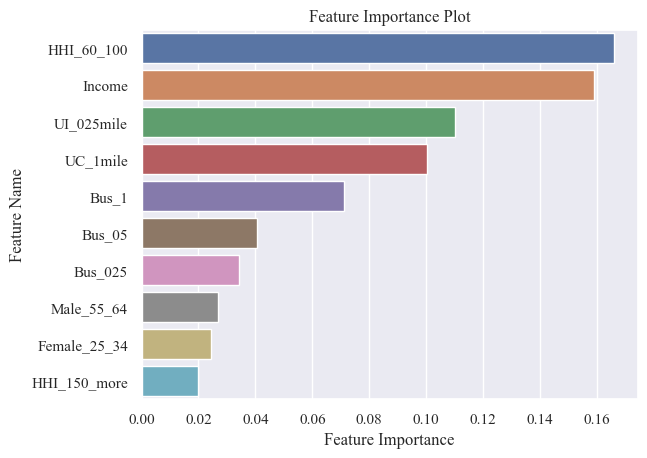

In [434]:
FeaImp(df_ped_)

### Trial

In [7]:
url='F:/#JOB_files/TTI/Final Data/SUP/'
df=pd.read_excel(url+"FULL_prepared_data_ampm_SUP_v13.xlsx")

In [10]:
df[df.city_area=="Midland"]

,stationid,year,Mode,ampeak,pmpeak,daily_count,county,Latitude,Longitude,TotPop_1mile,...,AWND,ADT_025mile,ADT_05mile,ADT_1mile,ADT_previous_year_025mile,ADT_previous_year_05mile,ADT_previous_year_1mile,city_area,ADT_phil,AADT_phil
746,MI0006,2018,All,2.000000,2.400000,20.800000,Midland,31.990269,-102.134926,77693.54635,...,11.2,NaN,NaN,NaN,NaN,NaN,NaN,Midland,20.800000,NaN
747,MI0007,2018,All,348.333333,538.333333,3918.333333,Midland,31.965866,-102.141113,12131.70356,...,11.2,NaN,NaN,NaN,NaN,NaN,NaN,Midland,3918.333333,NaN
